

*   pta-123
*   pta-001
*   pta-111









# shahd essam abdelkhalek

In [ ]:
import numpy as np

class TicTacToeEnvironment:
    def __init__(self):
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None

    def apply_move(self, row, col):
        if self.game_over:
            print("Game is over. Please reset to play again.")
            return False
        if not (0 <= row < 3 and 0 <= col < 3):
            print("Invalid move: Position out of bounds.")
            return False
        if self.board[row, col] != ' ':
            print("Invalid move: Position already taken.")
            return False

        self.board[row, col] = self.current_player
        self.check_game_state()
        if not self.game_over:
            self.current_player = 'O' if self.current_player == 'X' else 'X'
        return True

    def check_game_state(self):
        # Check rows, columns, and diagonals for a win
        for i in range(3):
            if (self.board[i, 0] == self.board[i, 1] == self.board[i, 2] != ' '):
                self.winner = self.board[i, 0]
                self.game_over = True
                return
            if (self.board[0, i] == self.board[1, i] == self.board[2, i] != ' '):
                self.winner = self.board[0, i]
                self.game_over = True
                return

        if (self.board[0, 0] == self.board[1, 1] == self.board[2, 2] != ' '):
            self.winner = self.board[0, 0]
            self.game_over = True
            return
        if (self.board[0, 2] == self.board[1, 1] == self.board[2, 0] != ' '):
            self.winner = self.board[0, 2]
            self.game_over = True
            return

        # Check for draw
        if ' ' not in self.board:
            self.game_over = True
            self.winner = None # Indicates a draw
            return

        self.game_over = False
        self.winner = None

    def reset_game(self):
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None
        print("Game reset.")

    def display_board(self):
        print("\n" + "---" * 3)
        for row in self.board:
            print('|' + '|'.join(row) + '|')
            print("-" * 9)
        print("Current Player: ", self.current_player)
        if self.game_over:
            if self.winner:
                print(f"Game Over! Winner: {self.winner}")
            else:
                print("Game Over! It's a Draw.")
        print("\n")

print("TicTacToeEnvironment class defined.")

TicTacToeEnvironment class defined.


In [ ]:
import numpy as np

class TicTacToeEnvironment:
    def __init__(self):
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None

    def apply_move(self, row, col):
        if self.game_over:
            # print("Game is over. Please reset to play again.")
            return False
        if not (0 <= row < 3 and 0 <= col < 3):
            # print("Invalid move: Position out of bounds.")
            return False
        if self.board[row, col] != ' ':
            # print("Invalid move: Position already taken.")
            return False

        self.board[row, col] = self.current_player
        self.check_game_state()
        if not self.game_over:
            self.current_player = 'O' if self.current_player == 'X' else 'X'
        return True

    def check_game_state(self):
        # Check rows, columns, and diagonals for a win
        for i in range(3):
            if (self.board[i, 0] == self.board[i, 1] == self.board[i, 2] != ' '):
                self.winner = self.board[i, 0]
                self.game_over = True
                return
            if (self.board[0, i] == self.board[1, i] == self.board[2, i] != ' '):
                self.winner = self.board[0, i]
                self.game_over = True
                return

        if (self.board[0, 0] == self.board[1, 1] == self.board[2, 2] != ' '):
            self.winner = self.board[0, 0]
            self.game_over = True
            return
        if (self.board[0, 2] == self.board[1, 1] == self.board[2, 0] != ' '):
            self.winner = self.board[0, 2]
            self.game_over = True
            return

        # Check for draw
        if ' ' not in self.board:
            self.game_over = True
            self.winner = None # Indicates a draw
            return

        self.game_over = False
        self.winner = None

    def reset_game(self):
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None
        # print("Game reset.")

    def display_board(self):
        print("\n" + "---" * 3)
        for row in self.board:
            print('|' + '|'.join(row) + '|')
            print("-" * 9)
        print("Current Player: ", self.current_player)
        if self.game_over:
            if self.winner:
                print(f"Game Over! Winner: {self.winner}")
            else:
                print("Game Over! It's a Draw.")
        print("\n")

    def get_state_representation(self):
        """Converts the current board state into a hashable tuple of tuples."""
        return tuple(tuple(row) for row in self.board)


class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.q_table = {}
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon

    def get_q_value(self, state, action):
        """Retrieves the Q-value for a given state-action pair. Initializes if not present."""
        if state not in self.q_table:
            self.q_table[state] = {(r, c): 0.0 for r in range(3) for c in range(3)}
        return self.q_table[state].get(action, 0.0)

    def update_q_value(self, state, action, reward, next_state, possible_next_actions):
        """Updates the Q-value for a given state-action pair using the Q-learning formula."""
        current_q = self.get_q_value(state, action)

        # Find the maximum Q-value for the next state
        max_next_q = 0.0
        if next_state in self.q_table and possible_next_actions:
            max_next_q = max([self.get_q_value(next_state, next_action) for next_action in possible_next_actions])

        new_q = current_q + self.lr * (reward + self.gamma * max_next_q - current_q)
        self.q_table[state][action] = new_q

    def choose_action(self, state, available_actions):
        """Chooses an action using an epsilon-greedy policy."""
        if not available_actions:
            return None # No actions available

        if np.random.uniform(0, 1) < self.epsilon: # Explore
            return available_actions[np.random.randint(len(available_actions))]
        else: # Exploit
            q_values = {action: self.get_q_value(state, action) for action in available_actions}
            max_q = -np.inf
            best_actions = []
            for action, q_val in q_values.items():
                if q_val > max_q:
                    max_q = q_val
                    best_actions = [action]
                elif q_val == max_q:
                    best_actions.append(action)

            return best_actions[np.random.randint(len(best_actions))]

print("TicTacToeEnvironment class updated with get_state_representation. QLearningAgent class defined with Q-table initialization.")


TicTacToeEnvironment class updated with get_state_representation. QLearningAgent class defined with Q-table initialization.


In [ ]:
import numpy as np

# Re-defining classes just in case the kernel was reset or for self-contained execution
class TicTacToeEnvironment:
    def __init__(self):
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None

    def apply_move(self, row, col):
        if self.game_over:
            return False
        if not (0 <= row < 3 and 0 <= col < 3):
            return False
        if self.board[row, col] != ' ':
            return False

        self.board[row, col] = self.current_player
        self.check_game_state()
        if not self.game_over:
            self.current_player = 'O' if self.current_player == 'X' else 'X'
        return True

    def check_game_state(self):
        # Check rows, columns, and diagonals for a win
        for i in range(3):
            if (self.board[i, 0] == self.board[i, 1] == self.board[i, 2] != ' '):
                self.winner = self.board[i, 0]
                self.game_over = True
                return
            if (self.board[0, i] == self.board[1, i] == self.board[2, i] != ' '):
                self.winner = self.board[0, i]
                self.game_over = True
                return

        if (self.board[0, 0] == self.board[1, 1] == self.board[2, 2] != ' '):
            self.winner = self.board[0, 0]
            self.game_over = True
            return
        if (self.board[0, 2] == self.board[1, 1] == self.board[2, 0] != ' '):
            self.winner = self.board[0, 2]
            self.game_over = True
            return

        # Check for draw
        if ' ' not in self.board:
            self.game_over = True
            self.winner = None # Indicates a draw
            return

        self.game_over = False
        self.winner = None

    def reset_game(self):
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None

    def get_state_representation(self):
        return tuple(tuple(row) for row in self.board)


class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, epsilon=1.0, min_epsilon=0.01, epsilon_decay_rate=0.99995):
        self.q_table = {}
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate

    def get_q_value(self, state, action):
        if state not in self.q_table:
            # Initialize Q-values for all possible actions in this state to 0.0
            self.q_table[state] = {(r, c): 0.0 for r in range(3) for c in range(3)}
        return self.q_table[state].get(action, 0.0)

    def update_q_value(self, state, action, reward, next_state, possible_next_actions):
        current_q = self.get_q_value(state, action)

        max_next_q = 0.0
        if not possible_next_actions: # If no next actions, then it's a terminal state
            max_next_q = 0.0 # No future rewards from a terminal state
        elif next_state in self.q_table:
            max_next_q = max([self.get_q_value(next_state, next_action) for next_action in possible_next_actions])
        # If next_state is not in q_table, get_q_value will initialize entries to 0, so max will be 0.

        new_q = current_q + self.lr * (reward + self.gamma * max_next_q - current_q)
        self.q_table[state][action] = new_q

    def choose_action(self, state, available_actions):
        if not available_actions:
            return None

        if np.random.uniform(0, 1) < self.epsilon: # Explore
            return available_actions[np.random.randint(len(available_actions))]
        else: # Exploit
            q_values = {action: self.get_q_value(state, action) for action in available_actions}
            max_q = -np.inf
            best_actions = []
            for action, q_val in q_values.items():
                if q_val > max_q:
                    max_q = q_val
                    best_actions = [action]
                elif q_val == max_q:
                    best_actions.append(action)

            # Randomly choose among actions with the maximum Q-value
            return best_actions[np.random.randint(len(best_actions))]

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay_rate)

# Training Loop

#  Initialize the TicTacToeEnvironment and QLearningAgent classes.
#  Using an initial epsilon of 1.0 to ensure full exploration at the start.
env = TicTacToeEnvironment()
agent = QLearningAgent(
    learning_rate=0.1,
    discount_factor=0.9,
    epsilon=1.0, # Start with high exploration
    min_epsilon=0.01,
    epsilon_decay_rate=0.99995 # Slow decay
)

num_episodes = 50000 # Large number of episodes for training

# Keep track of rewards and wins to visualize learning progress
episode_rewards = []
win_loss_draw_counts = {'X': 0, 'O': 0, 'Draw': 0}

print(f"Starting Q-learning training for {num_episodes} episodes...")

for episode in range(num_episodes):
    env.reset_game()
    episode_history = [] # Stores (state, action) pairs for this episode
    current_episode_reward = 0

    # Agent 'X' is the one being trained, 'O' is also the same agent but effectively playing as the opponent.

    while not env.game_over:
        current_state = env.get_state_representation()

        # Identify available actions (empty cells)
        available_actions = []
        for r in range(3):
            for c in range(3):
                if env.board[r, c] == ' ':
                    available_actions.append((r, c))

        if not available_actions:
            break # Should not happen if check_game_state works, but as a safeguard

        chosen_action = agent.choose_action(current_state, available_actions)

        if chosen_action is None:
            break # No valid action chosen, should not happen unless available_actions is empty

        # Store the state and action before applying the move.
        # This is for the agent whose turn it is. The Q-table update will happen after the game.
        episode_history.append((current_state, chosen_action, env.current_player))

        # Apply the chosen action
        move_successful = env.apply_move(chosen_action[0], chosen_action[1])

        if not move_successful:
            # This case should ideally not be reached if available_actions and choose_action are correct
            # However, it's good for debugging during development.
            # print(f"Error: Agent tried invalid move {chosen_action} in state {current_state}")
            break

        # Assign a small negative reward for each non-winning, non-losing move
        # This encourages quicker games. This reward is for the player who just moved.
        # This initial reward will be adjusted after the final outcome.
        current_episode_reward -= 0.01

    # Game has ended, determine final reward and update Q-table
    final_reward = 0
    if env.winner == 'X':
        final_reward = 1.0 # Agent 'X' wins
        win_loss_draw_counts['X'] += 1
    elif env.winner == 'O':
        final_reward = -1.0 # Agent 'X' loses (Opponent 'O' wins)
        win_loss_draw_counts['O'] += 1
    else: # Draw
        final_reward = 0.5 # Neutral reward for a draw (can be 0)
        win_loss_draw_counts['Draw'] += 1

    # Add the final reward to the episode's cumulative reward
    current_episode_reward += final_reward
    episode_rewards.append(current_episode_reward)

    # Propagate rewards backward through the episode history
    # The last state in the history is the one *before* the winning/losing move.
    # The 'next_state' will be the terminal state after the action, which has a Q-value of 0.
    # We'll work backwards, applying the Bellman equation.


    # When an agent 'X' makes a move, the next state and reward are from 'X's perspective.
    # When an agent 'O' makes a move, the next state and reward are from 'O's perspective.
    # Since we are training 'X', we update 'X's Q-table.
    # The 'opponent' agent ('O') also uses the same Q-table, which is implicitly trained.


    for i in reversed(range(len(episode_history))):
        state, action, player_who_moved = episode_history[i]



        # Determine the reward from the perspective of the *training agent ('X')*
        # The final_reward is always from 'X's perspective (1.0 for X win, -1.0 for O win)
        reward_for_current_player = final_reward if player_who_moved == 'X' else -final_reward

        # Add small penalty for every move for the current player for quicker games
        reward_for_current_player -= 0.01



        if i == len(episode_history) - 1: # Last move in the episode
            # The Q-value for the state-action pair leading to the terminal state is updated directly with the final reward.
            next_state_rep = env.get_state_representation() # Actual board state at the end of the game
            possible_next_actions = [] # No actions from a terminal state
        else:


            next_state_rep = episode_history[i+1][0] # The state before the next player's move

            # Reconstruct available actions for this `next_state_rep`
            temp_board = np.array([list(row) for row in next_state_rep])
            possible_next_actions = []
            for r in range(3):
                for c in range(3):
                    if temp_board[r, c] == ' ':
                        possible_next_actions.append((r, c))

        # Update the Q-value for the player who made the move
        agent.update_q_value(state, action, reward_for_current_player, next_state_rep, possible_next_actions)

    # Decay epsilon after each episode
    agent.decay_epsilon()

    if episode % 1000 == 0:
        print(f"Episode {episode}/{num_episodes}, Epsilon: {agent.epsilon:.4f}, Recent Rewards Avg: {np.mean(episode_rewards[-1000:]):.4f}, Wins: X={win_loss_draw_counts['X']}, O={win_loss_draw_counts['O']}, Draw={win_loss_draw_counts['Draw']}")
        # Reset win counts periodically to see learning trends
        win_loss_draw_counts = {'X': 0, 'O': 0, 'Draw': 0}

print("Training complete.")
print(f"Final Q-table size: {len(agent.q_table)} unique states")


Starting Q-learning training for 50000 episodes...
Episode 0/50000, Epsilon: 1.0000, Recent Rewards Avg: 0.9300, Wins: X=1, O=0, Draw=0
Episode 1000/50000, Epsilon: 0.9512, Recent Rewards Avg: 0.3005, Wins: X=590, O=279, Draw=131
Episode 2000/50000, Epsilon: 0.9048, Recent Rewards Avg: 0.3069, Wins: X=603, O=279, Draw=118
Episode 3000/50000, Epsilon: 0.8607, Recent Rewards Avg: 0.2743, Wins: X=576, O=292, Draw=132
Episode 4000/50000, Epsilon: 0.8187, Recent Rewards Avg: 0.2835, Wins: X=587, O=290, Draw=123
Episode 5000/50000, Epsilon: 0.7788, Recent Rewards Avg: 0.2290, Wins: X=564, O=319, Draw=117
Episode 6000/50000, Epsilon: 0.7408, Recent Rewards Avg: 0.2479, Wins: X=588, O=315, Draw=97
Episode 7000/50000, Epsilon: 0.7046, Recent Rewards Avg: 0.2055, Wins: X=554, O=332, Draw=114
Episode 8000/50000, Epsilon: 0.6703, Recent Rewards Avg: 0.2697, Wins: X=582, O=299, Draw=119
Episode 9000/50000, Epsilon: 0.6376, Recent Rewards Avg: 0.1826, Wins: X=537, O=342, Draw=121
Episode 10000/50000

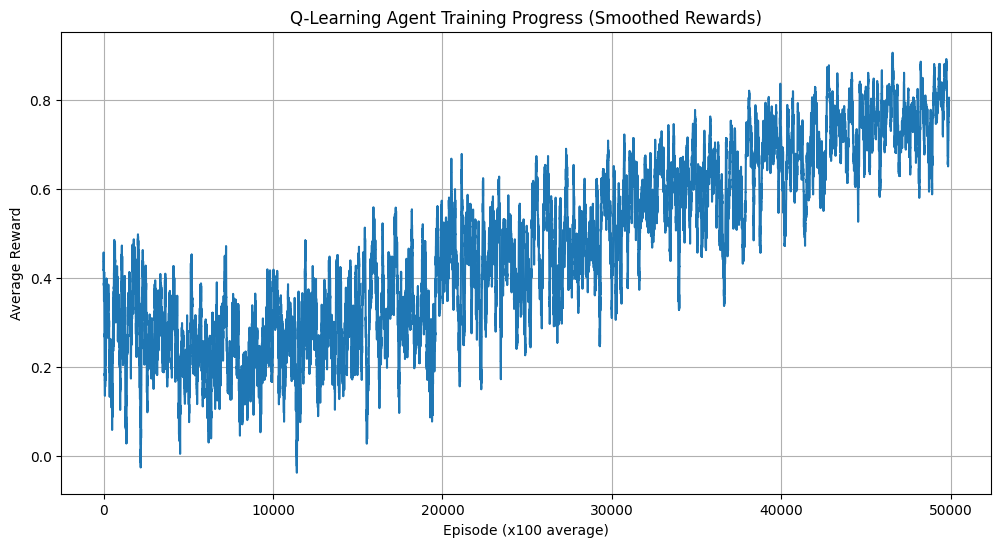

Learning progress visualization complete.


In [ ]:
import matplotlib.pyplot as plt

# Optional: Smooth the rewards for better visualization
# Using a moving average to smooth the plot
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

window_size = 100 # Adjust as needed
smoothed_rewards = moving_average(episode_rewards, window_size)

plt.figure(figsize=(12, 6))
plt.plot(smoothed_rewards)
plt.title('Q-Learning Agent Training Progress (Smoothed Rewards)')
plt.xlabel(f'Episode (x{window_size} average)')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

print("Learning progress visualization complete.")

In [ ]:
def random_opponent_play(env):
    """Randomly chooses a valid move for the opponent."""
    available_actions = []
    for r in range(3):
        for c in range(3):
            if env.board[r, c] == ' ':
                available_actions.append((r, c))

    if available_actions:
        # Choose a random action from the available ones
        return available_actions[np.random.randint(len(available_actions))]
    return None

print("Random opponent function defined.")

Random opponent function defined.


In [ ]:
import numpy as np

#  Set the epsilon value of the trained agent to 0
# This ensures the agent always exploits its learned Q-values during evaluation.
agent.epsilon = 0.0

#  Initialize a new TicTacToeEnvironment instance for evaluation.

eval_env = TicTacToeEnvironment()

# Set up an evaluation loop to run for a specified number of games
num_evaluation_games = 1000 # Number of games for evaluation

# Variables to record evaluation results
agent_wins = 0
agent_losses = 0
agent_draws = 0

print(f"\nStarting evaluation against a random opponent for {num_evaluation_games} games...")

for game in range(num_evaluation_games):
    eval_env.reset_game()

    while not eval_env.game_over:
        # Determine current player
        current_player = eval_env.current_player

        # Identify available actions (empty cells)
        available_actions = []
        for r in range(3):
            for c in range(3):
                if eval_env.board[r, c] == ' ':
                    available_actions.append((r, c))

        if not available_actions:
            # This case should imply a draw, but check_game_state handles it.
            break

        if current_player == 'X': # Trained agent's turn
            current_state = eval_env.get_state_representation()
            action_to_take = agent.choose_action(current_state, available_actions)
        else: # Random opponent's turn ('O')
            action_to_take = random_opponent_play(eval_env)

        if action_to_take is None:
            # Should not happen if available_actions is not empty
            break

        eval_env.apply_move(action_to_take[0], action_to_take[1])

    # Game has ended, record the outcome
    if eval_env.winner == 'X':
        agent_wins += 1
    elif eval_env.winner == 'O':
        agent_losses += 1
    else:
        agent_draws += 1

# After the evaluation loop, calculate win, loss, and draw percentages
total_games = num_evaluation_games
win_rate = (agent_wins / total_games) * 100
loss_rate = (agent_losses / total_games) * 100
draw_rate = (agent_draws / total_games) * 100

# Print the evaluation results
print("\n--- Evaluation Results ---")
print(f"Total Games Played: {total_games}")
print(f"Agent Wins (X): {agent_wins} ({win_rate:.2f}%)时不时)")
print(f"Agent Losses (O wins): {agent_losses} ({loss_rate:.2f}%)时不时)")
print(f"Draws: {agent_draws} ({draw_rate:.2f}%)时不时)")

print("Evaluation complete.")



Starting evaluation against a random opponent for 1000 games...

--- Evaluation Results ---
Total Games Played: 1000
Agent Wins (X): 952 (95.20%)时不时)
Agent Losses (O wins): 0 (0.00%)时不时)
Draws: 48 (4.80%)时不时)
Evaluation complete.


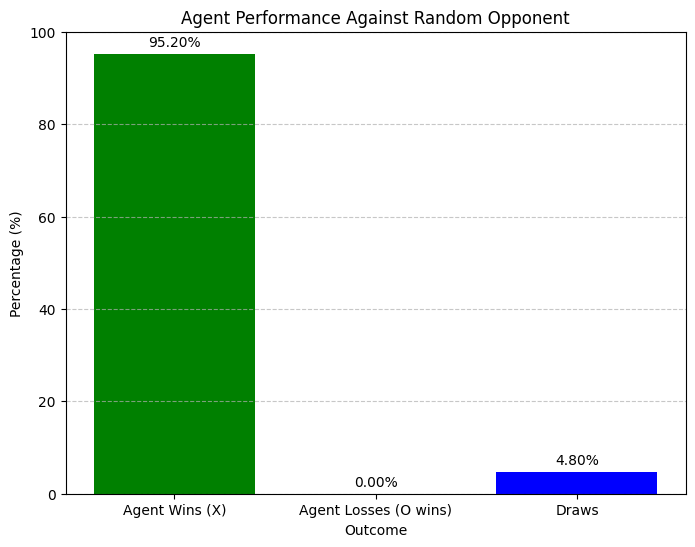

Agent performance visualization complete.


In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Agent Wins (X)', 'Agent Losses (O wins)', 'Draws']
percentages = [win_rate, loss_rate, draw_rate]
colors = ['green', 'red', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)
plt.xlabel('Outcome')
plt.ylabel('Percentage (%)')
plt.title('Agent Performance Against Random Opponent')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100

# Add percentage labels on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Agent performance visualization complete.")